In [1]:
from template_files import wholesale_customers

df = wholesale_customers.read_csv_2('data/wholesale_customers.csv')
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [2]:
df_statistics = wholesale_customers.summary_statistics(df)
df_statistics

,mean,std,min,max
Fresh,12000,12647,3,112151
Milk,5796,7380,55,73498
Grocery,7951,9503,3,92780
Frozen,3072,4855,25,60869
Detergents_Paper,2881,4768,3,40827
Delicassen,1525,2820,3,47943


In [3]:
df_standardized = wholesale_customers.standardize(df)
df_standardized

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052873,0.522972,-0.041068,-0.588697,-0.043519,-0.066264
1,-0.390857,0.543839,0.170125,-0.269829,0.086309,0.089050
2,-0.446521,0.408073,-0.028125,-0.137379,0.133080,2.240742
3,0.099998,-0.623310,-0.392530,0.686363,-0.498021,0.093305
4,0.839284,-0.052337,-0.079266,0.173661,-0.231654,1.297870
...,...,...,...,...,...,...
435,1.399719,0.847482,0.849793,2.072862,-0.566186,0.240817
436,2.152842,-0.591469,-0.756304,0.296223,-0.584853,0.291170
437,0.200098,1.313176,2.345716,-0.542762,2.508362,0.121318
438,-0.135230,-0.516947,-0.601829,-0.418964,-0.569122,0.212804


In [4]:
df_standardized_statistics = wholesale_customers.summary_statistics(df_standardized)
df_standardized_statistics

,mean,std,min,max
Fresh,0,1,-0.948603,7.918724
Milk,0,1,-0.777910,9.173208
Grocery,0,1,-0.836382,8.926367
Frozen,0,1,-0.627629,11.905449
Detergents_Paper,0,1,-0.603729,7.958613
Delicassen,0,1,-0.539650,16.459711


In [5]:
km = wholesale_customers.kmeans(df_standardized, 3)
km

0      1
1      1
2      1
3      1
4      1
      ..
435    1
436    1
437    2
438    1
439    1
Length: 440, dtype: int32

In [6]:
kpp = wholesale_customers.kmeans_plus(df_standardized, 3)
kpp

0      0
1      1
2      1
3      0
4      0
      ..
435    0
436    0
437    1
438    0
439    0
Length: 440, dtype: int32

In [7]:
agg = wholesale_customers.agglomerative(df, 3)
agg

0      0
1      0
2      0
3      0
4      0
      ..
435    0
436    0
437    0
438    0
439    0
Length: 440, dtype: int64

In [8]:
km_result = wholesale_customers.clustering_score(df, km)
kmpp_result = wholesale_customers.clustering_score(df, kpp)
agg_result = wholesale_customers.clustering_score(df, agg)
print(f'K-means result {km_result}')
print(f'K-means++ result {kmpp_result}')
print(f'Agglomerative result {agg_result}')

K-means result 0.5009719756430777
K-means++ result 0.29531727541042857
Agglomerative result 0.7459932776249836


In [9]:
cluster_results = wholesale_customers.cluster_evaluation(df)
cluster_results

,Algorithm,data,k,Silhouette Score
0,Kmeans,Original,3,0.548287
1,Kmeans,Original,5,0.372240
2,Kmeans,Original,10,0.320060
3,Agglomerative,Original,3,0.767580
4,Agglomerative,Original,5,0.736779
5,Agglomerative,Original,10,0.614384
6,Kmeans,Standardized,3,0.572900
7,Kmeans,Standardized,5,0.371321
8,Kmeans,Standardized,10,0.326153
9,Agglomerative,Standardized,3,0.767580


In [10]:
wholesale_customers.best_clustering_score(cluster_results)

0.7675801420229834

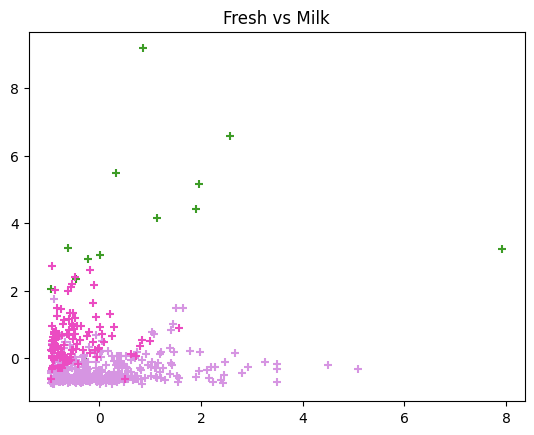

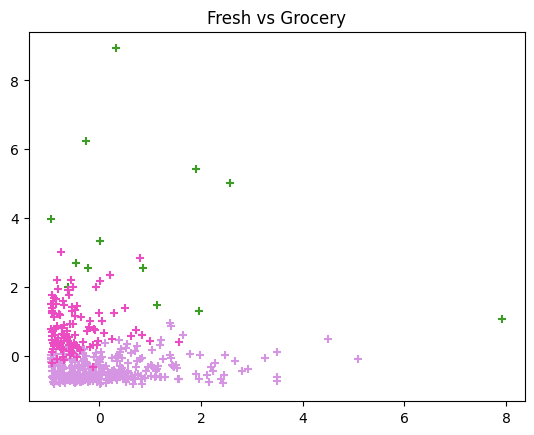

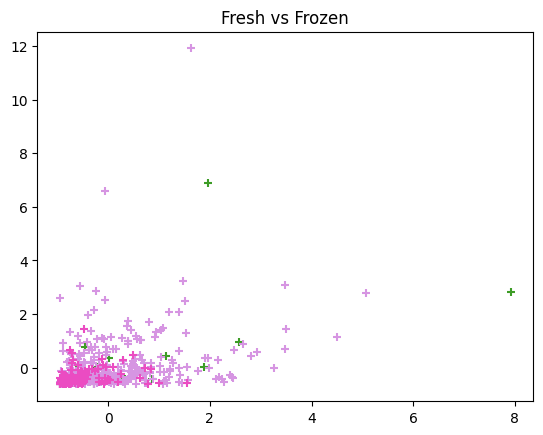

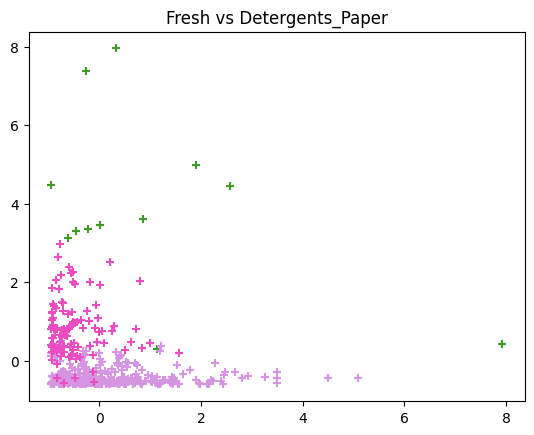

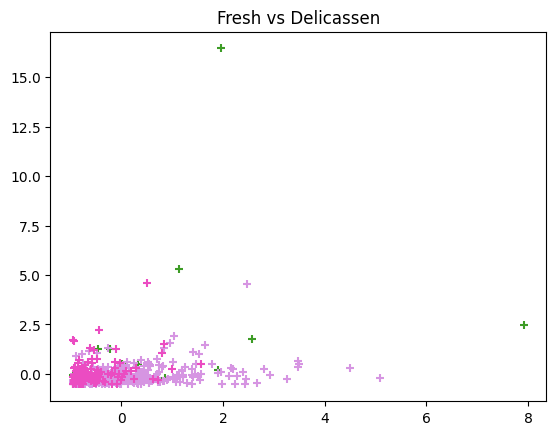

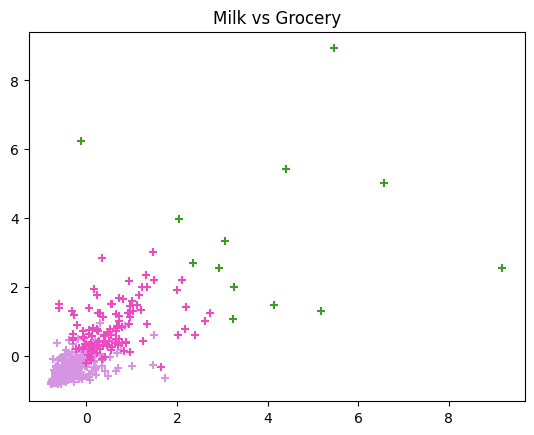

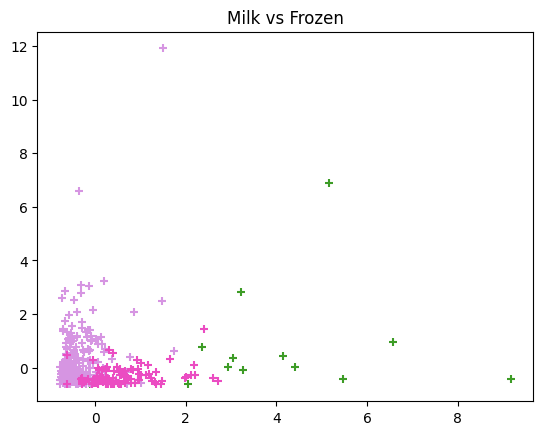

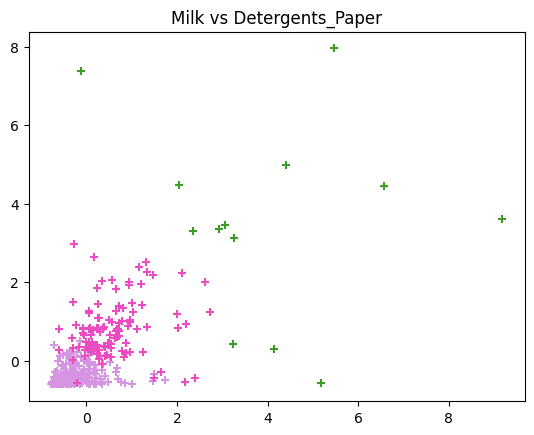

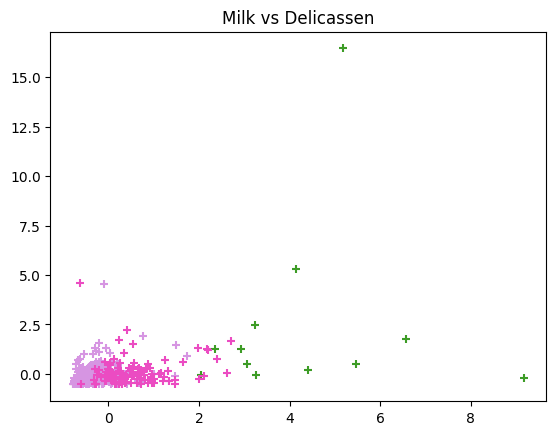

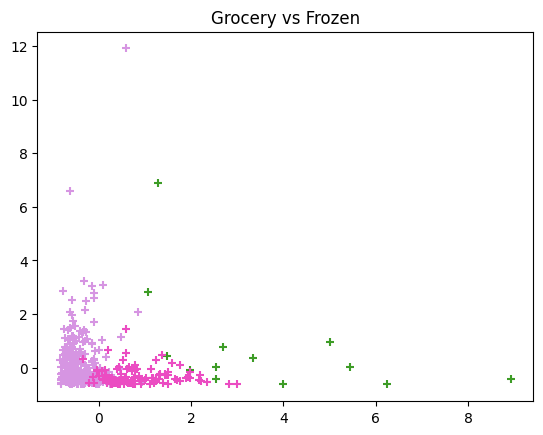

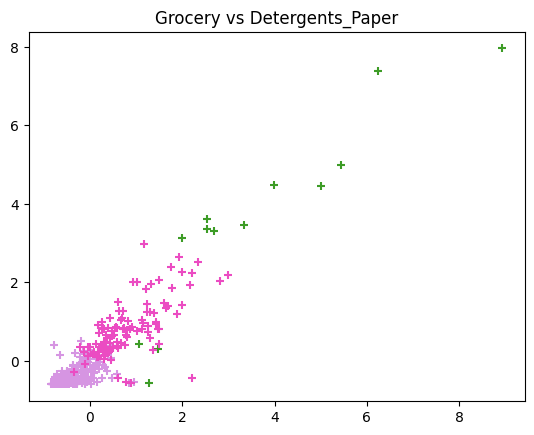

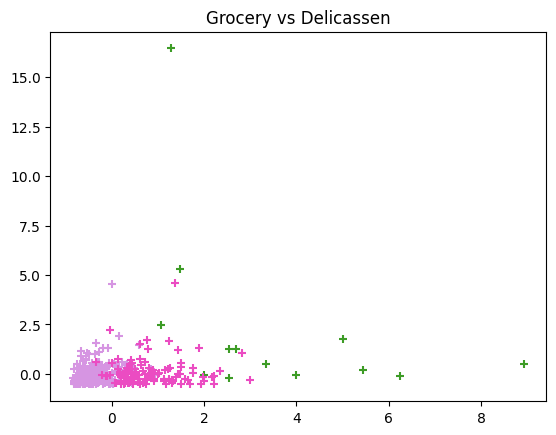

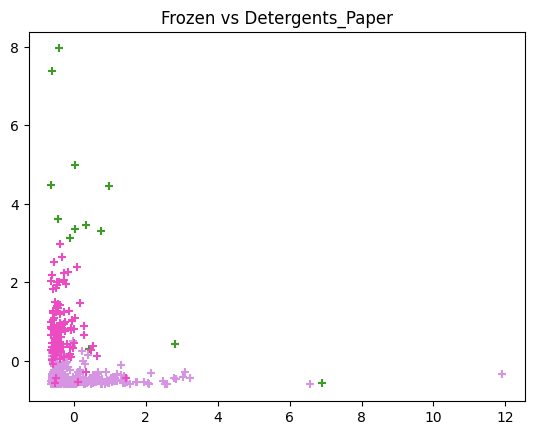

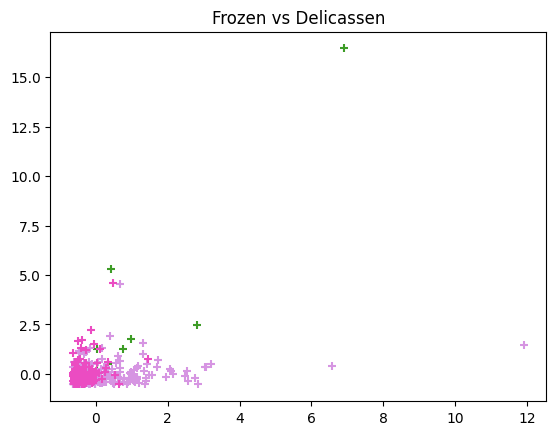

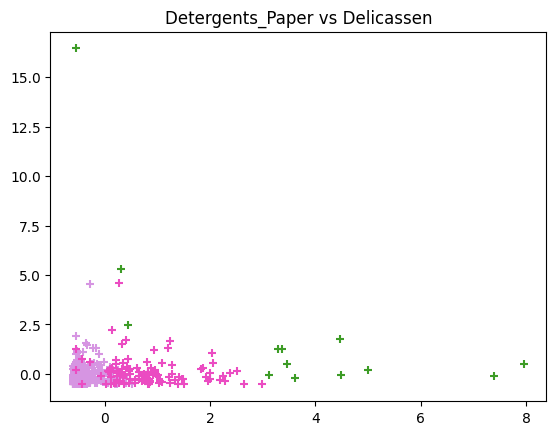

In [11]:
wholesale_customers.scatter_plots(df)